### Cardiovascular Disease Dataset
link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient

#### Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

###### All of the dataset values were collected at the moment of medical examination.

### Understanding of the problem

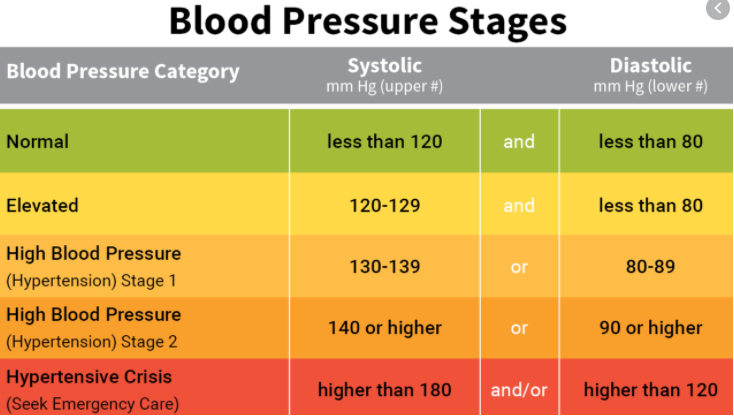

Key definitions:
* Systolic blood pressure - pressure exerted when blood is ejected into arteries. Normal systolic blood pressure is 120 mmHg or below

* Diastolic blood pressure - pressure blood exerts within arteries between heartbeats. Normal diastolic blood pressure is 80 mmHg or below

* High blood pressure = hypertension

* Primary hypertension - no known cause for high blood pressure and is the most common type of hypertension. Usually takes years to develop and is probably caused by a lifestyle, environment and how the body changes with age.

* Secondary hypertension - when a health problem or medicine is causing high blood pressure. Might be a result of kidney problems, sleep apnea, some medicines, thyroid or adrenal gland problems.

##### Over the years, research has found that both numbers are equally important in monitoring heart health. 
However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

##### High blood pressure (hypertension) is caused by:
* diet high in salt and/or cholesterol
* tobacco or drinking too much alcohol
* stress
* being overweight or obese
* older age (likelihood of high blood pressure increases with age)
* lack of physical activity
* chronic conditions - e.g. kidney and hormone problems, diabetes and high cholesterol
* family history (e.g. parents or close relatives with high blood pressure)
* insufficient intake of potassium, calcium, magnesium

##### Uncontrolled high blood pressure can lead to following complications:
* heart attack or stroke
* aneurysm
* heart failure
* weakened and narrowed blood vessels in your kidneys
* thickened, narrowed or torn blood vessels in the eyes
* metabolic syndrome
* trouble with memory or understanding
* dementia

### Objective: examine how following factors affect heart problems

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
#loading data and showing first 5 rows
data = pd.read_csv("C:/Users/Konrad/Desktop/DATA SCIENCE/Projekt Python - DataVirus/cardiovascular_disease_dataset/cardio_train.csv", delimiter = ";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [57]:
#last 5 rows
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [58]:
#how many rows and columns are in the dataset?
data.shape

(70000, 13)

In [15]:
#checking for number of unique values
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [16]:
#unique values in "cholesterol" column
data['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [17]:
#unique values in "gluc" column
data['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
#what columns are in the dataset?
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [59]:
#key characteristics of variables
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###### Some bugs detected in the dataset:
* age in days, not in years
* minimum wage of weight (10) seems as too low
* both ap_hi and ap_lo should not bring any negative values
* max values of both ap_hi and ap_lo need adjustment

In [60]:
#changing age to 'years' instead of 'days'
data['age'] = data['age']/365
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [61]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Cleaning the dataset

In [18]:
#checking for null values across dataset
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [62]:
#both systolic and diastolic blood pressure should not be negative
data[data['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0


In [63]:
data[data['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,61.838356,1,167,74.0,15,-70,1,1,0,0,1,1


In [65]:
#changing negative values into positive
data['ap_lo'] = data['ap_lo'].abs()
data['ap_hi'] = data['ap_hi'].abs()
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#both ap_hi and _ap_lo should be larger than 50
data = data.loc[data['ap_lo']>50]
data = data.loc[data['ap_hi']>50]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000
mean,49971.894758,53.328970,1.348866,164.365384,74.124451,126.598520,81.370701,1.364408,1.225823,0.088010,0.053546,0.803353,0.494807
std,28845.733348,6.761514,0.476615,8.183339,14.319892,16.601928,9.437918,0.678787,0.571833,0.283312,0.225122,0.397466,0.499977
min,0.000000,29.583562,1.000000,55.000000,11.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.500000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,53.978082,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74873.500000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,215.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#assumption: ap_hi<220 and ap_lo<150
data = data.loc[data['ap_lo']<150]
data = data.loc[data['ap_hi']<220]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000,68651.000000
mean,49971.894758,53.328970,1.348866,164.365384,74.124451,126.598520,81.370701,1.364408,1.225823,0.088010,0.053546,0.803353,0.494807
std,28845.733348,6.761514,0.476615,8.183339,14.319892,16.601928,9.437918,0.678787,0.571833,0.283312,0.225122,0.397466,0.499977
min,0.000000,29.583562,1.000000,55.000000,11.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.500000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,53.978082,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74873.500000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,215.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
#assumption: height should be at least 100cm and not excess 230cm
data = data.loc[data['height']>100]
data = data.loc[data['height']<230]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000
mean,49973.751622,53.329139,1.348902,164.404790,74.134169,126.603213,81.373187,1.364484,1.225900,0.088016,0.053556,0.803341,0.494862
std,28847.392691,6.760951,0.476626,7.961528,14.284414,16.601574,9.436412,0.678839,0.571916,0.283321,0.225141,0.397475,0.499977
min,0.000000,29.583562,1.000000,104.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.000000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50012.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74877.000000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,207.000000,200.000000,215.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#assumption: weight should be at least 35kg
data = data.loc[data['weight']>35]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000
mean,49973.751622,53.329139,1.348902,164.404790,74.134169,126.603213,81.373187,1.364484,1.225900,0.088016,0.053556,0.803341,0.494862
std,28847.392691,6.760951,0.476626,7.961528,14.284414,16.601574,9.436412,0.678839,0.571916,0.283321,0.225141,0.397475,0.499977
min,0.000000,29.583562,1.000000,104.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.000000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50012.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74877.000000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,207.000000,200.000000,215.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
#deleting 'id' column 
data = data.drop(columns='id')
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000,68601.000000
mean,53.329139,1.348902,164.404790,74.134169,126.603213,81.373187,1.364484,1.225900,0.088016,0.053556,0.803341,0.494862
std,6.760951,0.476626,7.961528,14.284414,16.601574,9.436412,0.678839,0.571916,0.283321,0.225141,0.397475,0.499977
min,29.583562,1.000000,104.000000,35.450000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,207.000000,200.000000,215.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Checking some scatter plots - visualization of outliers

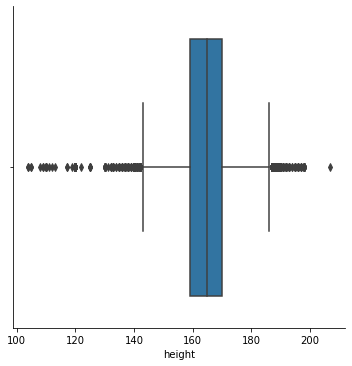

In [84]:
sns.catplot(x='height', kind='box', data=data)

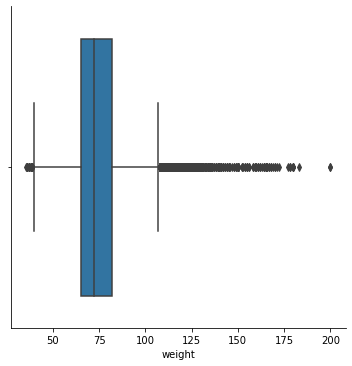

In [85]:
sns.catplot(x='weight', kind='box', data=data)

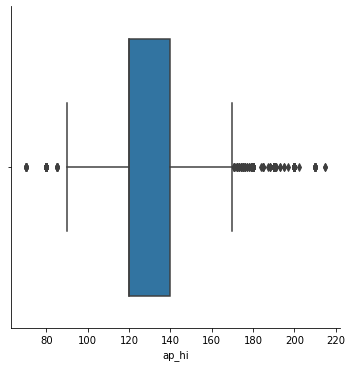

In [86]:
sns.catplot(x='ap_hi', kind='box', data=data)

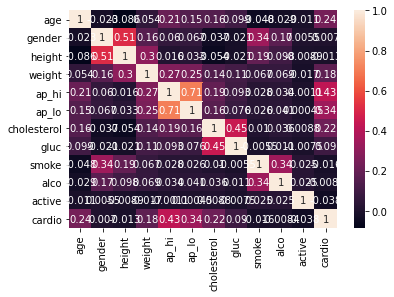

In [87]:
#correlation matrix
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
pass

#### Plotting some distribution charts

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


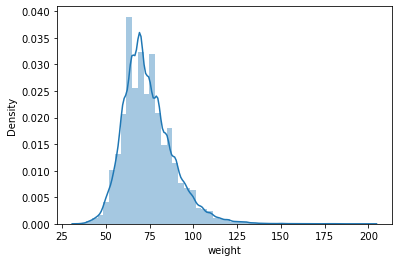

In [88]:
#distribution of weight
sns.distplot(data['weight'])
pass

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


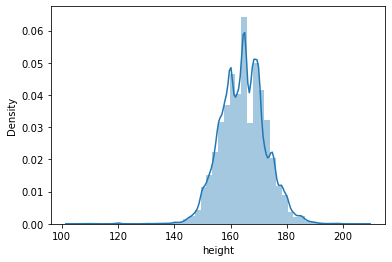

In [89]:
#distribution of height
sns.distplot(data['height'])
pass